In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Importing Dataset and configuring paths



## If you download the original dataset

In [3]:
!unzip "/content/drive/MyDrive/COD10K-v2.zip"

Streaming output truncated to the last 5000 lines.
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-24-Caterpillar-1651.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-24-Caterpillar-1654.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-25-Centipede-1656.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-25-Centipede-1657.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-25-Centipede-1660.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-25-Centipede-1661.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-25-Centipede-1662.jpg  
 extracting: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-26-Chameleon-1664.jpg  
 extracting: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-26-Chameleon-1665.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-26-Chameleon-1666.jpg  
  inflating: COD10K-v2/Train/Image/COD10K-CAM-2-Terrestrial-26-Chameleon-1668.jpg  
  inflating: COD10K-v

In [4]:
# Only if you are using the original dataset

!mkdir ./COD10K-v2/Train/Images
!mv ./COD10K-v2/Train/Image/ ./COD10K-v2/Train/Images/

!mkdir ./COD10K-v2/Train/GT_Objects/
!mv ./COD10K-v2/Train/GT_Object/ ./COD10K-v2/Train/GT_Objects/


!mkdir ./COD10K-v2/Test/Images/
!mv ./COD10K-v2/Test/Image/ ./COD10K-v2/Test/Images/

!mkdir ./COD10K-v2/Test/GT_Objects/
!mv ./COD10K-v2/Test/GT_Object/ ./COD10K-v2/Test/GT_Objects/

In [3]:
train_image_path  = './COD10K-v2/Train/Images'
train_labels_path = './COD10K-v2/Train/GT_Objects'

test_image_path   = './COD10K-v2/Test/Images'
test_labels_path  = './COD10K-v2/Test/GT_Objects'

## If you work with modified dataset and uploaded it to google drive

In [6]:
# train_image_path  = '/content/drive/MyDrive/COD10K-v2/Train/Images'
# train_labels_path = '/content/drive/MyDrive/COD10K-v2/Train/GT_Objects'

# test_image_path   = '/content/drive/MyDrive/COD10K-v2/Test/Images'
# test_labels_path  = '/content/drive/MyDrive/COD10K-v2/Test/GT_Objects'

# Importing DataLoader and Model classes

In [4]:
import sys
PROJECT_FOLDER = '/content/drive/MyDrive/COD_Project/'
sys.path.insert(0,PROJECT_FOLDER+'src/')

In [5]:
from DataLoader import DataLoader
from Model import SINetModel

In [6]:
SEARCH_ATTENTION = 'v2'  # v1' or 'v2'           else defaults to None ## But 'v2' Recommended
LOSS = 'tf_bce_logits'   # 'bce' or 'bce_logits' else defaults to tf.nn.sigmoid_cross_entropy_with_logits
USE_GENERATOR = False

In [9]:
# If use_generator = True then put hyper_batch_size = 20 and the batch size during the training is irrelevant (Recommended to avoid OOM errors)
# else put hyper_batch_size = 3500 (if this gives you OOM, lower it)
dl = DataLoader(train_image_path, train_labels_path, test_image_path, test_labels_path, use_generator=USE_GENERATOR, hyper_batch_size=3000)

# Training model

In [10]:
model = SINetModel(dl, search_attention=SEARCH_ATTENTION, resnet_weights="./resnet.h5")

Weights before loading from ResNet50 =  []
Loading ResNet weights to our model ...
94781440/94765736 [==============================] - 1s 0us/step
Weights after loading from ResNet50 =  []
Weights have not changed so Loading failed
We will train our model from scratch then ...


In [21]:
# Note that batch_size is irrelevent if the model's Dataloader's use_generator is set to True
# If that's the case, batch size is defaulted to the model's Dataloader's hyper_batch_size
h = model.train(save_weigths='./SINet_weights_search_att='+SEARCH_ATTENTION+'.h5', batch_size=4, epochs=40, loss=LOSS)

Training model ...
Epoch 1/40
563/563 [==============================] - 166s 235ms/step - loss: 0.4695 - SM_loss: 0.2333 - IM_loss: 0.2362 - val_loss: 8321.5889 - val_SM_loss: 0.3172 - val_IM_loss: 8321.2725
Epoch 2/40
563/563 [==============================] - 127s 225ms/step - loss: 0.4542 - SM_loss: 0.2256 - IM_loss: 0.2286 - val_loss: 881.1747 - val_SM_loss: 0.2746 - val_IM_loss: 880.9001
Epoch 3/40
563/563 [==============================] - 126s 225ms/step - loss: 0.4441 - SM_loss: 0.2210 - IM_loss: 0.2230 - val_loss: 3.7573 - val_SM_loss: 0.2560 - val_IM_loss: 3.5012
Epoch 4/40
563/563 [==============================] - 126s 225ms/step - loss: 0.4368 - SM_loss: 0.2175 - IM_loss: 0.2194 - val_loss: 0.4828 - val_SM_loss: 0.2301 - val_IM_loss: 0.2527
Epoch 5/40
563/563 [==============================] - 126s 224ms/step - loss: 0.4318 - SM_loss: 0.2156 - IM_loss: 0.2162 - val_loss: 122.2988 - val_SM_loss: 0.2296 - val_IM_loss: 122.0691
Epoch 6/40
563/563 [===========================

# Testing model

Plotting history of total loss with respect to epochs ...
Plotting history of total loss with respect to batches ...


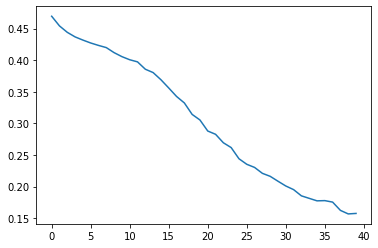

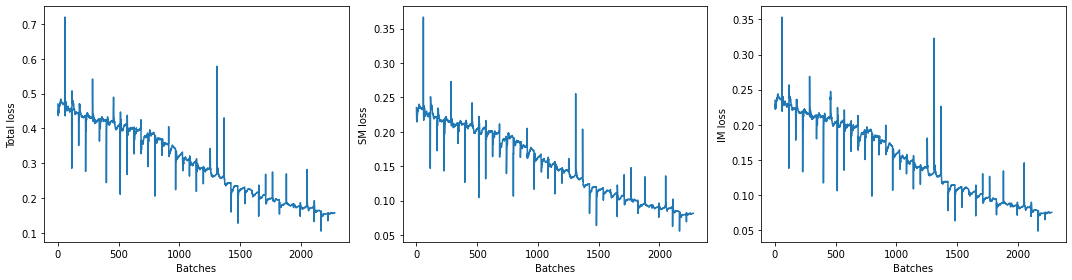

In [22]:
model.plot(h)

Testing model visually ...


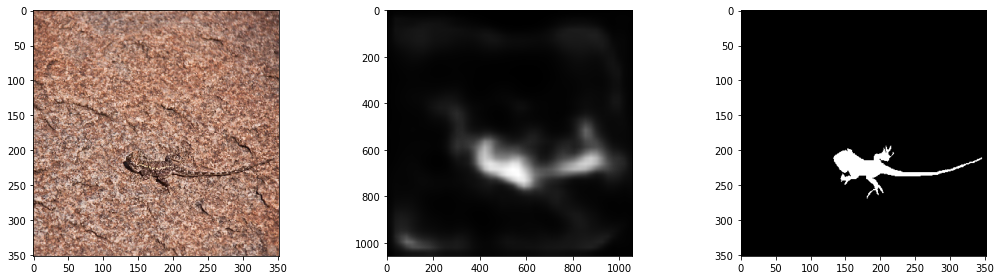

In [27]:
model.test('train')

Testing model visually ...


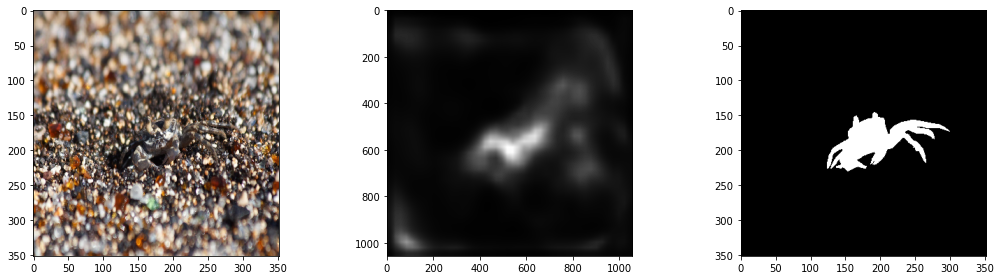

In [28]:
model.test('valid')

Sometimes model behaves wrongly after first training, If so, retrain for a dozen epochs (40, 20, 10). It converges eventually as shown in the report. We think this behaviors is due to different training batches or random weight initialization. 

You can execute the cells below to download and test our best model during this project.

# Testing already trained model

In [7]:
!pip install gdown

In [8]:
!gdown --fuzzy 'https://drive.google.com/file/d/1TGgwjVN02OrZc9NUBdFK0byXc6x8G7ff/view?usp=sharing'

Downloading...
From: https://drive.google.com/uc?id=1TGgwjVN02OrZc9NUBdFK0byXc6x8G7ff
To: /content/SINet_weights_search_att=v2.h5
100% 592M/592M [00:02<00:00, 205MB/s]


In [9]:
WEIGHTS_PATH = './SINet_weights_search_att=v2.h5'

In [10]:
dl = DataLoader(train_image_path, train_labels_path, test_image_path, test_labels_path, use_generator=True, hyper_batch_size=20)

In [11]:
model2 = SINetModel(dl, weights_path=WEIGHTS_PATH, search_attention='')

Loading train and validation data ...
Found 4800 images belonging to 1 classes.
Found 1200 images belonging to 1 classes.
Found 4800 images belonging to 1 classes.
Found 1200 images belonging to 1 classes.
Nb training data = 4800, training generator batch size = 20, training steps per epoch = 240
Nb validation data = 1200, validation generator batch size = 20, validation steps per epoch = 60
Testing model visually ...


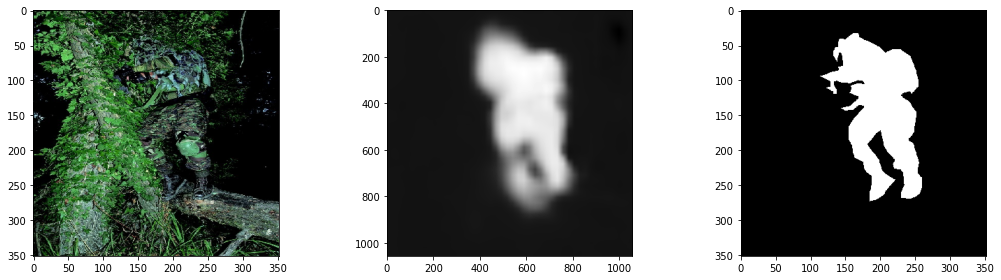

In [12]:
model2.test('train')

Testing model visually ...


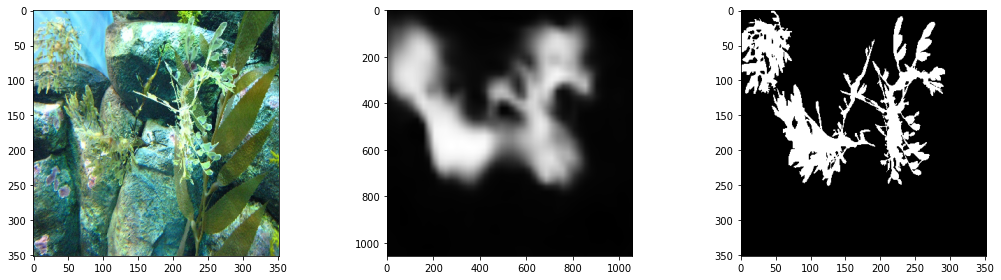

In [13]:
model2.test('valid')

Testing model visually ...


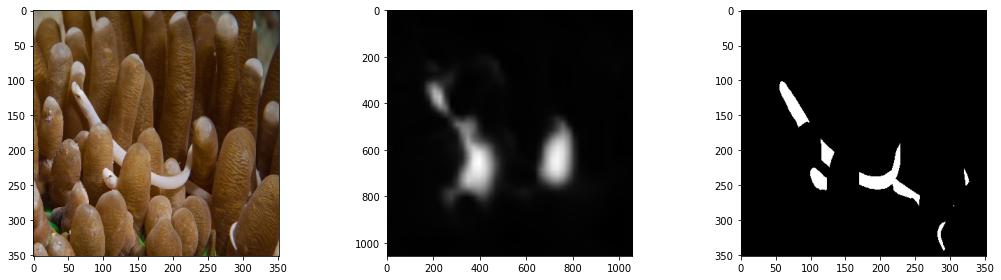

In [22]:
model2.test('test')